<center><h1>Verbal Autopsy Clustering</h1></center>

<hr>

<h2>Presentacion de datos</h2>

Primero vamos a importar todo lo necesario para llevar a cabo la tarea de clustering

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import nltk
from nltk.corpus import stopwords
import contractions
from nltk.stem import WordNetLemmatizer
import re
from nltk.stem import PorterStemmer
import seaborn as sb

Antes de empezar debemos crear un objeto a partir del archivo .csv que hemos escogido.

In [77]:
data = pd.read_csv("data/cleaned_PHMRC_VAI_redacted_free_text.train.csv")

Una vez creado aqui tenemos un pequeño ejemplo de lo que esta compuesto.

In [78]:
data.tail(5)

,newid,module,age,sex,site,open_response,gs_text34
5204,7120,Adult,42.0,1,UP,the deceased fell ill in the morning his breat...,Diabetes
5205,6101,Adult,14.0,2,Pemba,the respondant expained that the decease death...,Other Infectious Diseases
5206,6455,Adult,80.0,2,UP,the deceased had been admitted to hospital whe...,Pneumonia
5207,5026,Adult,70.0,1,UP,the deceased had been suffering from breathing...,Other Cardiovascular Diseases
5208,5326,Adult,30.0,1,Dar,the deceased died because of being hitted by a...,Other Injuries


Primero valoraremos si alguna de las instancias tiene algun valor null.

In [79]:
data_null = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5209 entries, 0 to 5208
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   newid          5209 non-null   int64  
 1   module         5209 non-null   object 
 2   age            5209 non-null   float64
 3   sex            5209 non-null   int64  
 4   site           5209 non-null   object 
 5   open_response  5209 non-null   object 
 6   gs_text34      5209 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 285.0+ KB


No se aprecia ninguna entidad con valor null.

<h3>Representación gráfica</h3>

<BarContainer object of 48 artists>

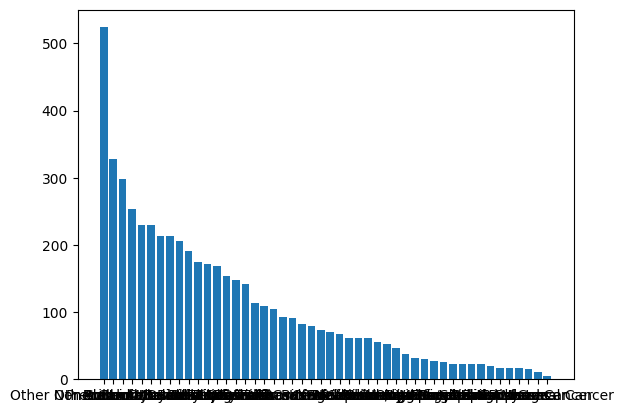

In [80]:
gs_text34 = data['gs_text34'].copy()
#plt.rcParams['figure.figsize'] = [40, 5]
plt.bar(gs_text34.value_counts().index, gs_text34.value_counts())

Al haber 48 tipos de muertes en el archivo .csv no se llega a apreciar bien la informacion. Por lo tanto vamos a hacer grafico mas pequeño para poder entenderlo mejor

<BarContainer object of 10 artists>

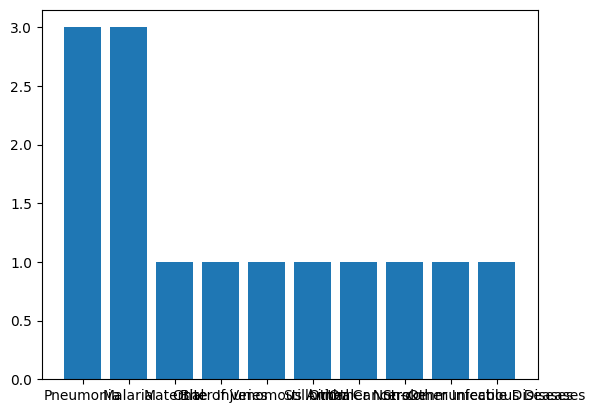

In [81]:
little_gs_text34 = gs_text34[0:14]
plt.bar(little_gs_text34.value_counts().index, little_gs_text34.value_counts())

Seleccionando solamente las 15 primera instancias del archivo .csv podemos apreciar que han habido 10 tipos diferentes de muerte y que solo dos de ellas se han repetido, en este caso 3 veces; Pneumonia y Malaria. 

<h3>Ver clases presentes y cadencia de cada una</h3>

In [82]:
print(data.groupby('gs_text34').size())

gs_text34
AIDS                                    154
Acute Myocardial Infarction             206
Asthma                                   17
Birth asphyxia                          171
Bite of Venomous Animal                  61
Breast Cancer                            62
COPD                                     80
Cervical Cancer                          22
Cirrhosis                               142
Colorectal Cancer                        37
Congenital malformation                  92
Diabetes                                174
Diarrhea/Dysentery                      229
Drowning                                 91
Encephalitis                             23
Epilepsy                                 20
Esophageal Cancer                         5
Falls                                   114
Fires                                   104
Hemorrhagic fever                        22
Homicide                                 74
Leukemia/Lymphomas                       46
Lung Cancer           

(Explicacion de que hay muchos tipos de conjuntos y vamos a agruparla en grupos mas grandes segun 'VA_ConsistentRelabelling.txt')

<h3>Agrupar clases en grupos más grandes</h3>

In [83]:
for i in range(len(data)):
    if data['gs_text34'][i] == 'TB':
        data['gs_text34'][i] = 'Certain infectious and Parasitic Diseases'  
    if data['gs_text34'][i] == 'Diarrhea/Dysentery':
        data['gs_text34'][i] = 'Certain infectious and Parasitic Diseases'
    if data['gs_text34'][i] == 'Other infectious diseases':
        data['gs_text34'][i] = 'Certain infectious and Parasitic Diseases'
    if data['gs_text34'][i] == 'AIDS':
        data['gs_text34'][i] = 'Certain infectious and Parasitic Diseases'
    if data['gs_text34'][i] == 'Sepsis':
        data['gs_text34'][i] = 'Certain infectious and Parasitic Diseases'
    if data['gs_text34'][i] == 'Meningitis':
        data['gs_text34'][i] = 'Certain infectious and Parasitic Diseases'
    if data['gs_text34'][i] == 'Meningitis/Sepsis':
        data['gs_text34'][i] = 'Certain infectious and Parasitic Diseases'
    if data['gs_text34'][i] == 'Malaria':
        data['gs_text34'][i] = 'Certain infectious and Parasitic Diseases'
    if data['gs_text34'][i] == 'Encephalitis':
        data['gs_text34'][i] = 'Certain infectious and Parasitic Diseases'
    if data['gs_text34'][i] == 'Measles':
        data['gs_text34'][i] = 'Certain infectious and Parasitic Diseases'
    if data['gs_text34'][i] == 'Hemorrhagic Fever':
        data['gs_text34'][i] = 'Certain infectious and Parasitic Diseases'
    if data['gs_text34'][i] == 'TB':
        data['gs_text34'][i] = 'Certain infectious and Parasitic Diseases'
    
    #----------------------------------------------------------------------------------
    
    if data['gs_text34'][i] == 'Leukemia/Lymphomas':
        data['gs_text34'][i] = 'Neoplasms'
    if data['gs_text34'][i] == 'Colorectal Cancer':
        data['gs_text34'][i] = 'Neoplasms'
    if data['gs_text34'][i] == 'Lung Cancer':
        data['gs_text34'][i] = 'Neoplasms'
    if data['gs_text34'][i] == 'Cervical Cancer':
        data['gs_text34'][i] = 'Neoplasms'
    if data['gs_text34'][i] == 'Breast Cancer':
        data['gs_text34'][i] = 'Neoplasms'
    if data['gs_text34'][i] == 'Stomach Cancer':
        data['gs_text34'][i] = 'Neoplasms'
    if data['gs_text34'][i] == 'Prostate Cancer':
        data['gs_text34'][i] = 'Neoplasms'
    if data['gs_text34'][i] == 'Esophageal Cancer':
        data['gs_text34'][i] = 'Neoplasms'
    if data['gs_text34'][i] == 'Other Cancers':
        data['gs_text34'][i] = 'Neoplasms'
        
    #----------------------------------------------------------------------------------

    if data['gs_text34'][i] == 'Diabetes':
        data['gs_text34'][i] = 'Endocrine, Nutritional and Metabolic Diseases'
    
    #----------------------------------------------------------------------------------

    if data['gs_text34'][i] == 'Epilepsy':
        data['gs_text34'][i] = 'Diseases of the Nervous System'
    
    #----------------------------------------------------------------------------------

    if data['gs_text34'][i] == 'Stroke':
        data['gs_text34'][i] = 'Diseases of the circulatory system'
    if data['gs_text34'][i] == 'Acute Myocardial Infarction':
        data['gs_text34'][i] = 'Diseases of the circulatory system'
    
    #----------------------------------------------------------------------------------
    
    if data['gs_text34'][i] == 'Pneumonia':
        data['gs_text34'][i] = 'Diseases of Respiratory System'
    if data['gs_text34'][i] == 'Asthma':
        data['gs_text34'][i] = 'Diseases of Respiratory System'
    if data['gs_text34'][i] == 'COPD':
        data['gs_text34'][i] = 'Diseases of Respiratory System'

    #----------------------------------------------------------------------------------

    if data['gs_text34'][i] == 'Cirrhosis':
        data['gs_text34'][i] = 'Diseases of the Digestive System'
    if data['gs_text34'][i] == 'Other Digestive Diseases':
        data['gs_text34'][i] = 'Diseases of the Digestive System'
    
    #----------------------------------------------------------------------------------

    if data['gs_text34'][i] == 'Renal Failure':
        data['gs_text34'][i] = 'Diseases of the Genitourinary System'
    
    #----------------------------------------------------------------------------------
    
    if data['gs_text34'][i] == 'Preterm Delivery':
        data['gs_text34'][i] = 'Pregnancy, childbirth and the puerperiu'
    if data['gs_text34'][i] == 'Stillbirth':
        data['gs_text34'][i] = 'Pregnancy, childbirth and the puerperiu'
    if data['gs_text34'][i] == 'Maternal':
        data['gs_text34'][i] = 'Pregnancy, childbirth and the puerperiu'
    if data['gs_text34'][i] == 'Birth Asphyxia':
        data['gs_text34'][i] = 'Pregnancy, childbirth and the puerperiu'
        
    #----------------------------------------------------------------------------------

    if data['gs_text34'][i] == 'Congenital Malformations':
        data['gs_text34'][i] = 'Congenital Malformations'
    
    #----------------------------------------------------------------------------------
    
    if data['gs_text34'][i] == 'Bite of Venomous Animal':
        data['gs_text34'][i] = 'Injury, Poisoning and External Causes'
    if data['gs_text34'][i] == 'Poisonings':
        data['gs_text34'][i] = 'Injury, Poisoning and External Causes'
        
    #----------------------------------------------------------------------------------
    
    if data['gs_text34'][i] == 'Road Traffic':
        data['gs_text34'][i] = 'External Causes of Morbidity and Mortality'
    if data['gs_text34'][i] == 'Falls':
        data['gs_text34'][i] = 'External Causes of Morbidity and Mortality'
    if data['gs_text34'][i] == 'Homicide':
        data['gs_text34'][i] = 'External Causes of Morbidity and Mortality'
    if data['gs_text34'][i] == 'Fires':
        data['gs_text34'][i] = 'External Causes of Morbidity and Mortality'
    if data['gs_text34'][i] == 'Drowning':
        data['gs_text34'][i] = 'External Causes of Morbidity and Mortality'
    if data['gs_text34'][i] == 'Suicide':
        data['gs_text34'][i] = 'External Causes of Morbidity and Mortality'
    if data['gs_text34'][i] == 'Violent Death':
        data['gs_text34'][i] = 'External Causes of Morbidity and Mortality'
    if data['gs_text34'][i] == 'Other Injuries':
        data['gs_text34'][i] = 'External Causes of Morbidity and Mortality'

/tmp/ipykernel_10092/2546714229.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['gs_text34'][i] = 'Diseases of Respiratory System'
/tmp/ipykernel_10092/2546714229.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['gs_text34'][i] = 'Pregnancy, childbirth and the puerperiu'
/tmp/ipykernel_10092/2546714229.py:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['gs_text34'][i] = 'External Causes of Morbidity and Morta

In [84]:
print(data.groupby('gs_text34').size())
print('________________________________________________________')
print('Numero de enfermedades: ' + str(len(np.unique(data['gs_text34']))))

gs_text34
Birth asphyxia                                   171
Certain infectious and Parasitic Diseases        716
Congenital malformation                           92
Diseases of Respiratory System                   621
Diseases of the Digestive System                 164
Diseases of the Genitourinary System             191
Diseases of the Nervous System                    20
Diseases of the circulatory system               504
Endocrine, Nutritional and Metabolic Diseases    174
External Causes of Morbidity and Mortality       681
Hemorrhagic fever                                 22
Injury, Poisoning and External Causes            117
Neoplasms                                        249
Other Cardiovascular Diseases                    213
Other Defined Causes of Child Deaths              83
Other Infectious Diseases                        168
Other Non-communicable Diseases                  253
Pregnancy, childbirth and the puerperiu          770
dtype: int64
_______________________

<h3>Quitar columnas que no den infarmacion.</h3>

(Explicacion)

In [85]:
data.drop('newid', axis=1, inplace=True)
data.head(5)

,module,age,sex,site,open_response,gs_text34
0,Adult,65.0,1,Bohol,date he felt a lower back pain and had fever s...,Diseases of Respiratory System
1,Child,0.0,2,Dar,the caese of death is pneumonia,Diseases of Respiratory System
2,Adult,23.0,2,AP,i took my wife to a private hospital for tubec...,"Pregnancy, childbirth and the puerperiu"
3,Adult,40.0,1,AP,he went to the work on sunday there were # iro...,External Causes of Morbidity and Mortality
4,Adult,55.0,1,UP,the deceased had died due to a snake bite the ...,"Injury, Poisoning and External Causes"


<h3>Información de los datos numericos.</h3>

/tmp/ipykernel_10092/391882538.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data.drop(['gs_text34'],1).hist()


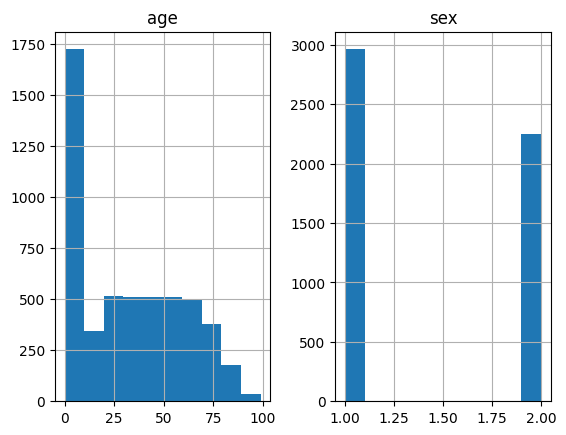

In [86]:
data.drop(['gs_text34'],1).hist()
plt.show()

(Explicacion)

In [87]:
data['gs_text34'].describe()

count                                        5209
unique                                         18
top       Pregnancy, childbirth and the puerperiu
freq                                          770
Name: gs_text34, dtype: object

(Explicacion)

<hr>

<h1>PreProcesamiento</h1>

Vamos a dividir el preprocesamiento en distintos pasos:

1.

2.

3.

4.

5.

6.

<h3>0. Traducir a español</h3>

In [88]:
data_esp = data.copy()

data_esp.head(5)

,module,age,sex,site,open_response,gs_text34
0,Adult,65.0,1,Bohol,date he felt a lower back pain and had fever s...,Diseases of Respiratory System
1,Child,0.0,2,Dar,the caese of death is pneumonia,Diseases of Respiratory System
2,Adult,23.0,2,AP,i took my wife to a private hospital for tubec...,"Pregnancy, childbirth and the puerperiu"
3,Adult,40.0,1,AP,he went to the work on sunday there were # iro...,External Causes of Morbidity and Mortality
4,Adult,55.0,1,UP,the deceased had died due to a snake bite the ...,"Injury, Poisoning and External Causes"


In [89]:
from time import sleep
import concurrent.futures
import goslate

executor = concurrent.futures.ThreadPoolExecutor(max_workers=1)
gs = goslate.Goslate(service_urls=['http://translate.google.de'], executor=executor)

def traducir_ing2esp(txt):
    return gs.translate(txt, 'es') 

def traducir_esp2ing(txt):
    return gs.translate(txt, 'en') 

In [90]:
#data_esp["open_response"] = data_esp["open_response"].head(5).apply(lambda txt: traducir_ing2esp(txt))
#data_esp.head(5)


<h2>1. Pasar a minusculas el texto</h2>

(Explicacion)
CREO QUE YA ESTABA TODO EN MINUSCULAS

In [91]:
def to_minusculas(txt):
    return txt.lower()

In [92]:
data["open_response"] = data["open_response"].str.lower()
data.head(5)

#data_esp["open_response"] = data_esp["open_response"].str.lower()
#data_esp.head(5)

,module,age,sex,site,open_response,gs_text34
0,Adult,65.0,1,Bohol,date he felt a lower back pain and had fever s...,Diseases of Respiratory System
1,Child,0.0,2,Dar,the caese of death is pneumonia,Diseases of Respiratory System
2,Adult,23.0,2,AP,i took my wife to a private hospital for tubec...,"Pregnancy, childbirth and the puerperiu"
3,Adult,40.0,1,AP,he went to the work on sunday there were # iro...,External Causes of Morbidity and Mortality
4,Adult,55.0,1,UP,the deceased had died due to a snake bite the ...,"Injury, Poisoning and External Causes"


<h2>2. Quitar marcas de puntuacion</h2>

(Explicacion)

In [93]:
def quitar_marcasPuntuacion(text:str):
    return text.translate(str.maketrans('', '', string.punctuation))

In [94]:
print(data["open_response"][45])

my mother suffered from fever continuously for # months she was treated in hospital where the doctor prescribed medicines but fever did not control later she was taken to hospital since the treatment was so expensive in the hospital the doctor advised us to take her to hospital but we did not take her to hospital but took her to hospital and admitted there since stains were present all over the body the doctors were firm to see the test results on the stains to proceed further on treatment by that time they were not specific to name the disease she was dead when the treatment was going on


In [95]:
data["open_response"] = data["open_response"].apply(lambda txt: quitar_marcasPuntuacion(txt))

#data_esp["open_response"] = data_esp["open_response"].apply(lambda txt: quitar_marcasPuntuacion(txt))


In [96]:
print(data["open_response"][45])

my mother suffered from fever continuously for  months she was treated in hospital where the doctor prescribed medicines but fever did not control later she was taken to hospital since the treatment was so expensive in the hospital the doctor advised us to take her to hospital but we did not take her to hospital but took her to hospital and admitted there since stains were present all over the body the doctors were firm to see the test results on the stains to proceed further on treatment by that time they were not specific to name the disease she was dead when the treatment was going on


<h2>3. Extender las contracciones</h2>

In [97]:
def extender_contracciones(text):    
    expanded_words = []   
    for word in text.split():
      # using contractions.fix to expand the shortened words
      expanded_words.append(contractions.fix(word))  

    return ' '.join(expanded_words)

In [98]:
cntrtn_text = "I've to go the toilet, I can't wait."
print(cntrtn_text)
print(extender_contracciones(cntrtn_text))

I've to go the toilet, I can't wait.
I have to go the toilet, I cannot wait.


In [99]:
data["open_response"] = data["open_response"].apply(lambda txt: extender_contracciones(txt))

<h2>4. Stemming</h2>

In [100]:
#stemmer = PorterStemmer()

#def stem_palabras(text):
#    return " ".join([stemmer.stem(word) for word in text.split()])

In [101]:
#print(data["open_response"][0])

In [102]:
#data["open_response"] = data["open_response"].apply(lambda text: stem_palabras(text))

In [103]:
#print(data["open_response"][0])

<h2>5. Lematizacion</h2>

In [104]:
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')
nltk.download('omw-1.4')

def lematizar_palabras(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

[nltk_data] Downloading package wordnet to /home/peio/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/peio/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [105]:
print(data["open_response"][0])

date he felt a lower back pain and had fever so we went to hospital here in place the doctor was suspecting arthritis he was ordered for x ray so we went to hospital lab results are all normal but suddenly the complained of difficulty in breathing the doctor said that he has pneumonia oxygen inhalation was started and still he was weak and his blood sugar was elevated and he died the ff day


In [106]:
data["open_response"] = data["open_response"].apply(lambda text: lematizar_palabras(text))

In [107]:
print(data["open_response"][0])

date he felt a lower back pain and had fever so we went to hospital here in place the doctor wa suspecting arthritis he wa ordered for x ray so we went to hospital lab result are all normal but suddenly the complained of difficulty in breathing the doctor said that he ha pneumonia oxygen inhalation wa started and still he wa weak and his blood sugar wa elevated and he died the ff day


<h2>6. Quitar las stopwords</h2>

(Explicacion)

In [108]:
nltk.download('stopwords')
def quitar_stopwords(txt:str):
    return ' '.join([word for word in txt.split(' ') if word not in stopwords.words('english')])

[nltk_data] Downloading package stopwords to /home/peio/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [109]:
print(data["open_response"][1])

the caese of death is pneumonia


In [110]:
data["open_response"] = data["open_response"].apply(lambda txt: quitar_stopwords(txt))


In [111]:
print(data["open_response"][1])

caese death pneumonia


<h3>7. Quitar espacios extra</h3>

In [112]:
def quitar_espaciosExtra(txt:str):
    return re.sub(' +', ' ', txt)

In [113]:
xtrSpc_text = "I've   to  go the toilet,  I can't   wait."
print(xtrSpc_text)
print(quitar_espaciosExtra(xtrSpc_text))

I've   to  go the toilet,  I can't   wait.
I've to go the toilet, I can't wait.


In [114]:
data["open_response"] = data["open_response"].apply(lambda text: quitar_espaciosExtra(text))

#data_esp["open_response"] = data_esp["open_response"].apply(lambda text: quitar_espaciosExtra(text))

<h3>8. Pasar todo a numeros</h3>

In [115]:
data.head(5)

,module,age,sex,site,open_response,gs_text34
0,Adult,65.0,1,Bohol,date felt lower back pain fever went hospital ...,Diseases of Respiratory System
1,Child,0.0,2,Dar,caese death pneumonia,Diseases of Respiratory System
2,Adult,23.0,2,AP,took wife private hospital tubectomy time wa p...,"Pregnancy, childbirth and the puerperiu"
3,Adult,40.0,1,AP,went work sunday iron rod brother person went ...,External Causes of Morbidity and Mortality
4,Adult,55.0,1,UP,deceased died due snake bite deceased regained...,"Injury, Poisoning and External Causes"


In [116]:
from sklearn.preprocessing import LabelEncoder# creating initial dataframe

labelencoder = LabelEncoder()# Assigning numerical values and storing in another column
data['module'] = labelencoder.fit_transform(data['module'])
data['site'] = labelencoder.fit_transform(data['site'])

data.head(5)

,module,age,sex,site,open_response,gs_text34
0,0,65.0,1,1,date felt lower back pain fever went hospital ...,Diseases of Respiratory System
1,1,0.0,2,2,caese death pneumonia,Diseases of Respiratory System
2,0,23.0,2,0,took wife private hospital tubectomy time wa p...,"Pregnancy, childbirth and the puerperiu"
3,0,40.0,1,0,went work sunday iron rod brother person went ...,External Causes of Morbidity and Mortality
4,0,55.0,1,5,deceased died due snake bite deceased regained...,"Injury, Poisoning and External Causes"


<h3>Guardar preproceso</h3>

In [117]:
data.to_csv('data_output/preproceso.csv')
#data_esp.to_csv('data_output/preproceso_esp.csv')

<hr>

<h2>Informacion sobre Data</h2>

<h3>Palablas mas usadas</h3>

In [118]:
from typing import Counter


cnt = Counter()

for text in data["open_response"].values:
    for word in text.split():
        cnt[word] += 1  

cnt.most_common(10)

[('wa', 16944),
 ('hospital', 7142),
 ('doctor', 4002),
 ('day', 3713),
 ('deceased', 3413),
 ('baby', 3239),
 ('died', 2885),
 ('said', 2436),
 ('year', 2320),
 ('also', 1918)]

<h3>WordCloud</h3>

/tmp/ipykernel_10092/1175978792.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  mascara = imread('./images/maskHealth.png')


(-0.5, 511.5, 511.5, -0.5)

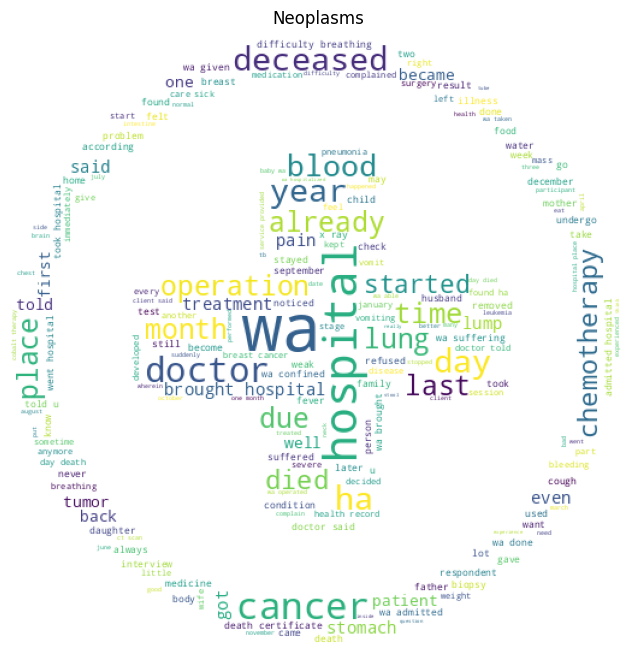

In [119]:
from wordcloud import WordCloud
from imageio import imread

neoplasms = data[data["gs_text34"]=="Neoplasms"]
neoplasms = neoplasms['open_response']

mascara = imread('./images/maskHealth.png')

neoplasmsWC = WordCloud(background_color='white',mask=mascara).generate(' '.join(neoplasms))
plt.figure(figsize=(11,8))
plt.imshow(neoplasmsWC)
plt.title("Neoplasms")
plt.axis("off")

(-0.5, 511.5, 511.5, -0.5)

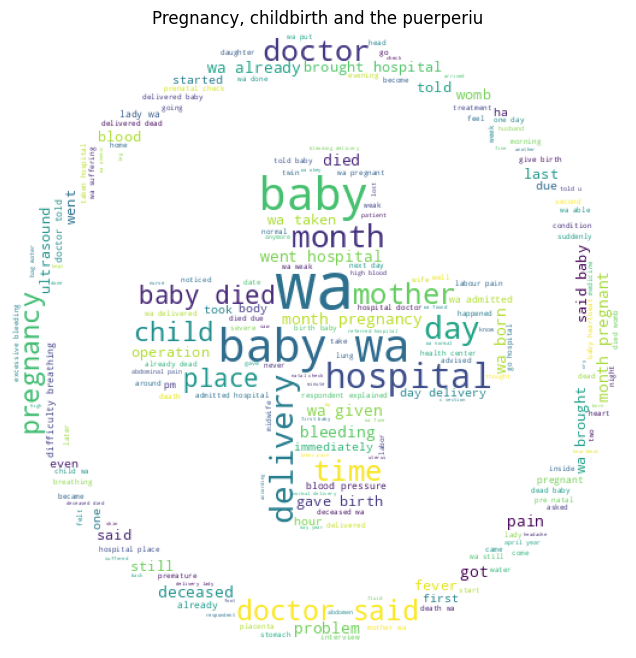

In [120]:
pcp = data[data["gs_text34"]=="Pregnancy, childbirth and the puerperiu"]
pcp = pcp['open_response']

pcpWC = WordCloud(background_color='white',mask=mascara).generate(' '.join(pcp))
plt.figure(figsize=(11,8))
plt.imshow(pcpWC)
plt.title("Pregnancy, childbirth and the puerperiu")
plt.axis("off")

<hr>

<h2>Document embeding</h2>

In [17]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument


try: data
except NameError: data = pd.read_csv("data_output/preproceso.csv")

tagged_data = [TaggedDocument(d, [i]) for i, d in enumerate(data['open_response'])]

In [18]:
model = Doc2Vec(vector_size=400, min_count=100, epochs=20, workers=5) #crear el modelo
model.build_vocab(tagged_data) #crear el diccionario del modelo a partir del atributo 'open_response' de nuestras instancias
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs) #entrenar el modelo

In [19]:
model.save("model/doc2vec.model") #guardar el modelo para no tener que entrenarlo en cada ejecución


In [20]:
tagged_df = pd.Series( (v[0] for v in tagged_data))
data_de = pd.DataFrame(columns=list(range(400)), index=list(range(len(data))))

for i in range(data.shape[0]):
    data_de.loc[i] = model.infer_vector(tagged_df[i].split(" "))

data_de.to_csv('data_output/doc_embeding.csv')


<hr>

<h2>TF-IDF</h2>

In [6]:
data = pd.read_csv("data_output/preproceso.csv")
data.tail(5)

,Unnamed: 0,module,age,sex,site,open_response,gs_text34
5204,5204,0,42.0,1,5,deceased fell ill morning breathing wa rapid p...,"Endocrine, Nutritional and Metabolic Diseases"
5205,5205,0,14.0,2,4,respondant expained decease death ha caused te...,Other Infectious Diseases
5206,5206,0,80.0,2,5,deceased admitted hospital underwent treatment...,Diseases of Respiratory System
5207,5207,0,70.0,1,5,deceased suffering breathing problem since mon...,Other Cardiovascular Diseases
5208,5208,0,30.0,1,2,deceased died hitted sharp knofe,External Causes of Morbidity and Mortality


In [7]:
data_array = np.array(data["open_response"])
data_array

array(['date felt lower back pain fever went hospital place doctor wa suspecting arthritis wa ordered x ray went hospital lab result normal suddenly complained difficulty breathing doctor said ha pneumonia oxygen inhalation wa started still wa weak blood sugar wa elevated died ff day',
       'caese death pneumonia',
       'took wife private hospital tubectomy time wa pregnant said carrying one month doctor ensuring safety doctor abortion wa done properly since wa infected suffered abortion kidney also infected whole body got swelling injection wa given yolk fetus wa emitted shifting hospital dysentery labored breathing died wa dead negligence private doctor',
       ...,
       'deceased admitted hospital underwent treatment day doctor fed egg tube caused problem deceased wa admitted hospital wa put oxygen oxygen cylinder empty cylinder wa replaced hour check wa found deceased wa lacking blood year deceased caught cold undergone treatment place week analysis wa done hospital place wa

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=30, stop_words='english') 

In [9]:
bag_words = vectorizer.fit_transform(data_array)
print(bag_words.shape)


(5209, 805)


In [10]:
tf_idf = pd.DataFrame(bag_words.todense(), columns=vectorizer.get_feature_names())
tf_idf

/home/peio/anaconda3/envs/md/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abdomen,abdominal,able,accident,according,ache,administered,admission,admit,admitted,...,worsen,worsened,worst,wound,wrong,xray,year,yellow,yellowish,young
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5204,0.242315,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.298077,...,0.0,0.0,0.0,0.0,0.0,0.0,0.132404,0.0,0.0,0.0
5205,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
5206,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.202922,...,0.0,0.0,0.0,0.0,0.0,0.0,0.090137,0.0,0.0,0.0
5207,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [11]:
tf_idf.to_csv('data_output/tf_idf.csv')

<hr>

<h2>Representacion grafica</h2>

<h3>TSNE</h3>

In [ ]:
from sklearn.manifold import TSNE

#try: data
#except NameError: data = pd.read_csv("data_output/doc_embeding.csv")

data = pd.read_csv("data_output/doc_embeding.csv")

tsne = TSNE(n_components=3, verbose=1, perplexity=20, n_iter=250)
tsne_results = tsne.fit_transform(data)
tsne_results

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 5209 samples in 0.000s...
[t-SNE] Computed neighbors for 5209 samples in 0.449s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5209
[t-SNE] Computed conditional probabilities for sample 2000 / 5209
[t-SNE] Computed conditional probabilities for sample 3000 / 5209
[t-SNE] Computed conditional probabilities for sample 4000 / 5209
[t-SNE] Computed conditional probabilities for sample 5000 / 5209
[t-SNE] Computed conditional probabilities for sample 5209 / 5209
[t-SNE] Mean sigma: 7.128120
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.250389
[t-SNE] KL divergence after 251 iterations: 179769313486231570814527423731704356798070567525844996598917476803157260780028538760589558632766878171540458953514382464234321326889464182768467546703537516986049910576551282076245490090389328944075868508455133942304583236903222948165808559332123348274797826204144723168738177180919299881250404026184124858368.00

array([[-2.9916945,  4.2885447,  3.3769863],
       [-2.992215 ,  4.2893095,  3.3772478],
       [-2.9904146,  4.288432 ,  3.3761322],
       ...,
       [ 1.5923012, -4.216706 , -4.106087 ],
       [ 1.5887271, -4.213929 , -4.105433 ],
       [ 1.5895205, -4.21588  , -4.102372 ]], dtype=float32)

In [ ]:
label = pd.read_csv("data_output/preproceso.csv")
label = label['gs_text34']

data['tsne-one'] = tsne_results[:,0]
data['tsne-two'] = tsne_results[:,1]
data['tsne-three'] = tsne_results[:,2]
data['gs_text34'] = label
data_tsn = data.filter(['tsne-one', 'tsne-two','tsne-three','gs_text34'])
data_tsn.to_csv('data_graphics/data_tsne.csv')
data_tsn

,tsne-one,tsne-two,tsne-three,gs_text34
0,-2.991694,4.288545,3.376986,Diseases of Respiratory System
1,-2.992215,4.289310,3.377248,Diseases of Respiratory System
2,-2.990415,4.288432,3.376132,"Pregnancy, childbirth and the puerperiu"
3,-2.992430,4.293755,3.377234,External Causes of Morbidity and Mortality
4,-2.989641,4.288625,3.377295,"Injury, Poisoning and External Causes"
...,...,...,...,...
5204,1.589375,-4.214855,-4.106235,"Endocrine, Nutritional and Metabolic Diseases"
5205,1.589281,-4.215004,-4.105125,Other Infectious Diseases
5206,1.592301,-4.216706,-4.106087,Diseases of Respiratory System
5207,1.588727,-4.213929,-4.105433,Other Cardiovascular Diseases


In [ ]:
import plotly.express as px

pca_3d = px.scatter_3d(data_tsn, x='tsne-one', y='tsne-two', z='tsne-three', color='gs_text34')
pca_3d.show()

<h3>PCA</h3>

https://builtin.com/data-science/tsne-python

In [ ]:
from sklearn.decomposition import PCA

data = pd.read_csv("data_output/doc_embeding.csv")

pca = PCA(n_components=3)
pca_result = pca.fit_transform(data)
pca_result

array([[-2.60400000e+03,  4.48981951e-01,  6.89074075e-02],
       [-2.60300000e+03, -5.59270919e-02,  4.78067381e-03],
       [-2.60200000e+03, -6.13186794e-02,  5.02267141e-03],
       ...,
       [ 2.60200000e+03, -6.22602402e-02,  7.06110160e-03],
       [ 2.60300000e+03, -6.73645595e-02,  6.69557666e-03],
       [ 2.60400000e+03, -6.52544752e-02,  3.08852342e-03]])

In [ ]:
label = pd.read_csv("data_output/preproceso.csv")
label = label['gs_text34']

data['pca-one'] = pca_result[:,0]
data['pca-two'] = pca_result[:,1]
data['pca-three'] = pca_result[:,2]
data['gs_text34'] = label

data_pca = data.filter(['pca-one', 'pca-two','pca-three','gs_text34'])
data_pca.to_csv('data_graphics/data_pca.csv')

data_pca

,pca-one,pca-two,pca-three,gs_text34
0,-2603.999999,0.467211,0.068644,Diseases of Respiratory System
1,-2603.000000,-0.063272,0.006980,Diseases of Respiratory System
2,-2602.000000,-0.062195,0.006135,"Pregnancy, childbirth and the puerperiu"
3,-2601.000000,0.034048,-0.014687,External Causes of Morbidity and Mortality
4,-2600.000000,-0.055643,0.004091,"Injury, Poisoning and External Causes"
...,...,...,...,...
5204,2600.000000,-0.066797,0.009768,"Endocrine, Nutritional and Metabolic Diseases"
5205,2601.000000,-0.068244,0.007501,Other Infectious Diseases
5206,2602.000000,-0.066063,0.008268,Diseases of Respiratory System
5207,2603.000000,-0.062586,0.005207,Other Cardiovascular Diseases


In [ ]:
pca_3d = px.scatter_3d(data_pca, x='pca-one', y='pca-two', z='pca-three', color='gs_text34')
pca_3d.show()


<h3>TSNE - PCA50</h3>

In [ ]:
data = pd.read_csv("data_output/doc_embeding.csv")

pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(data)

In [ ]:
tsne = TSNE(n_components=3, verbose=0, perplexity=40, n_iter=300)
tsne_pca_results = tsne.fit_transform(pca_result_50)
tsne_pca_results

/home/peio/anaconda3/envs/md/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/home/peio/anaconda3/envs/md/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



array([[-5.4185987 ,  5.83472   , -6.1588054 ],
       [-5.41114   ,  5.831033  , -6.1588583 ],
       [-5.403309  ,  5.827159  , -6.1589    ],
       ...,
       [ 1.3299383 ,  8.957638  ,  0.17567211],
       [ 1.3261397 ,  8.966057  ,  0.17652948],
       [ 1.3225044 ,  8.974076  ,  0.17734623]], dtype=float32)

In [ ]:
label = pd.read_csv("data_output/preproceso.csv")
label = label['gs_text34']

data['tsne-pca50-one'] = tsne_pca_results[:,0]
data['tsne-pca50-two'] = tsne_pca_results[:,1]
data['tsne-pca50-three'] = tsne_pca_results[:,2]
data['gs_text34'] = label

data_tsne_pca = data.filter(['tsne-pca50-one', 'tsne-pca50-two','tsne-pca50-three','gs_text34'])
data_tsne_pca.to_csv('data_graphics/data_tsne_pca.csv')

data_tsne_pca

,tsne-pca50-one,tsne-pca50-two,tsne-pca50-three,gs_text34
0,-5.418599,5.834720,-6.158805,Diseases of Respiratory System
1,-5.411140,5.831033,-6.158858,Diseases of Respiratory System
2,-5.403309,5.827159,-6.158900,"Pregnancy, childbirth and the puerperiu"
3,-5.395133,5.823121,-6.158950,External Causes of Morbidity and Mortality
4,-5.386448,5.818781,-6.159007,"Injury, Poisoning and External Causes"
...,...,...,...,...
5204,1.338063,8.939382,0.173862,"Endocrine, Nutritional and Metabolic Diseases"
5205,1.333899,8.948742,0.174779,Other Infectious Diseases
5206,1.329938,8.957638,0.175672,Diseases of Respiratory System
5207,1.326140,8.966057,0.176529,Other Cardiovascular Diseases


In [ ]:
tsne_pca_3d = px.scatter_3d(data_tsne_pca, x='tsne-pca50-one', y='tsne-pca50-two', z='tsne-pca50-three', color='gs_text34')
tsne_pca_3d.show()

<h3>Comparacion 2D</h3>

<AxesSubplot: xlabel='tsne-pca50-one', ylabel='tsne-pca50-two'>

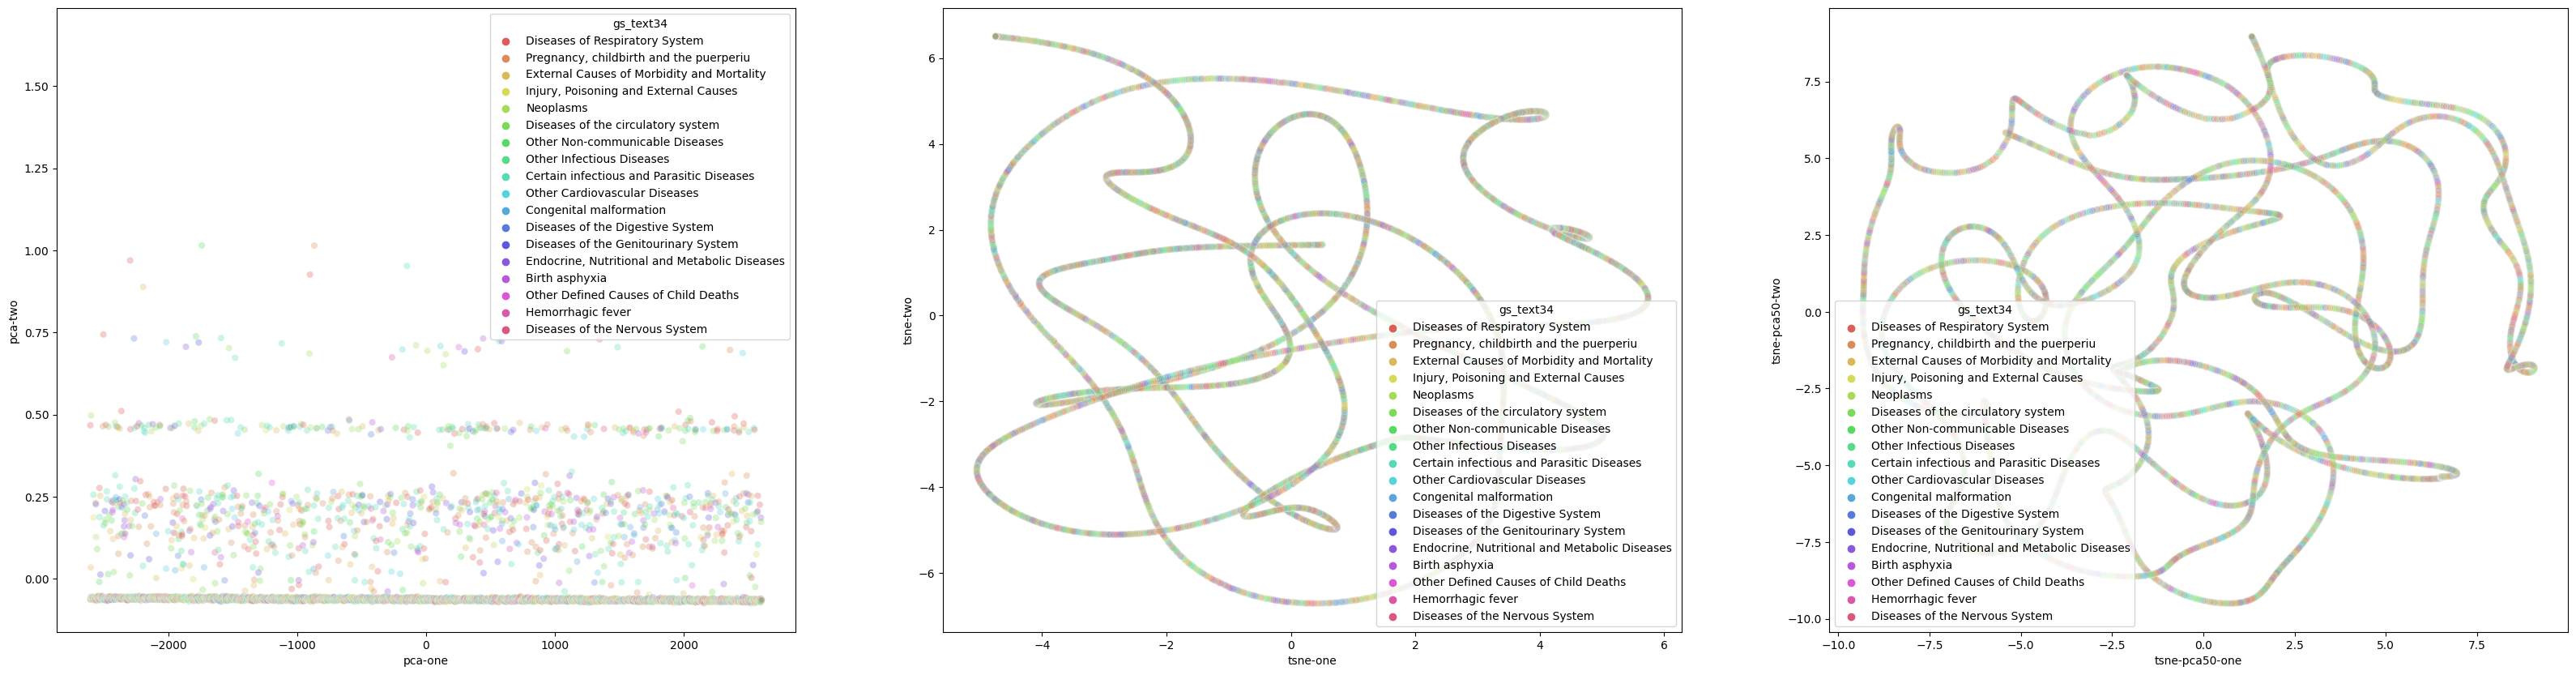

In [ ]:
import seaborn as sns

plt.figure(figsize=(40,10))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 1)
ax3 = plt.subplot(1, 3, 1)

sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="gs_text34",
    palette=sns.color_palette("hls", 18),
    data=data_pca,
    legend="full",
    alpha=0.3,
    ax=ax1
)

ax2 = plt.subplot(1, 3, 2)
sns.scatterplot(
    x="tsne-one", y="tsne-two",
    hue="gs_text34",
    palette=sns.color_palette("hls", 18),
    data=data_tsn,
    legend="full",
    alpha=0.3,
    ax=ax2
)

ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(
    x="tsne-pca50-one", y="tsne-pca50-two",
    hue="gs_text34",
    palette=sns.color_palette("hls", 18),
    data=data_tsne_pca,
    legend="full",
    alpha=0.3,
    ax=ax3
)